In [1]:
using EtaCoefficients
using QuantumDynamics
using Plots, LaTeXStrings

In [2]:
H = [0.0 -1.0; -1.0 0.0]
H

2×2 Matrix{Float64}:
  0.0  -1.0
 -1.0   0.0

In [3]:
ρ0 = [1.0 0; 0 0]

2×2 Matrix{Float64}:
 1.0  0.0
 0.0  0.0

# Fast, Weakly-coupled Bath

In [45]:
sd = spectral_density.OhmicSpectralDensity(0.1, 7.5, 1.0)

EtaCoefficients.spectral_density.OhmicSpectralDensity(0.1, 7.5, 1.0)

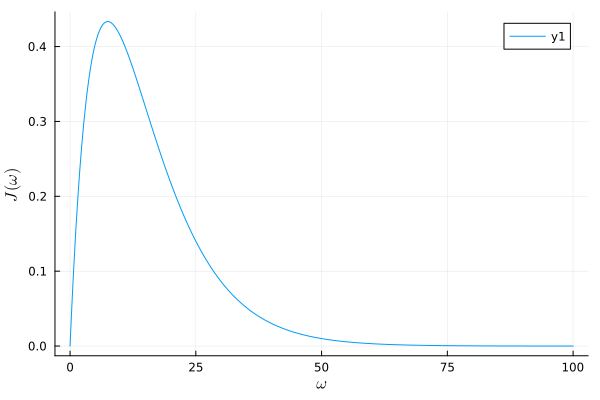

In [46]:
ω = 0:0.1:100
plot(ω, sd.(ω))
xlabel!(L"\omega")
ylabel!(L"J(\omega)")

In [47]:
dt = 0.25
ntimes = 100
time = 0:dt:dt*ntimes
β = 5.0

5.0

In [48]:
sigma_z = []
colors = ["red" "green" "blue" "yellow" "magenta"]
kmax = 1:2:9
for k in kmax
    @time ρs = QuAPI.propagate(; Hamiltonian=H, spect_dens=sd, β, ρ0, dt, ntimes, kmax=k)
    push!(sigma_z, real(ρs[1,1,:] - ρs[2,2,:]))
end
sigma_z_TTM = []
rmax = 1:2:9
for r in rmax
    @time ρs = TTM.propagate(; Hamiltonian=H, spect_dens=sd, β, ρ0, dt, ntimes, rmax=r, build_propagator=QuAPI.build_propagator)
    push!(sigma_z_TTM, real(ρs[1,1,:] - ρs[2,2,:]))
end

  0.024845 seconds (912.29 k allocations: 33.241 MiB)


  0.051471 seconds (1.09 M allocations: 69.174 MiB)


  0.270020 seconds (3.92 M allocations: 364.285 MiB, 31.29% gc time)


  2.822415 seconds (48.16 M allocations: 4.457 GiB, 16.82% gc time)


 62.482086 seconds (740.85 M allocations: 68.110 GiB, 39.48% gc time)
  0.026266 seconds (901.33 k allocations: 32.502 MiB)


  0.177249 seconds (905.54 k allocations: 51.667 MiB, 75.11% gc time)
  0.056697 seconds (940.93 k allocations: 74.014 MiB)


  0.097274 seconds (1.48 M allocations: 147.238 MiB)


  0.896200 seconds (10.00 M allocations: 1.007 GiB, 36.56% gc time)


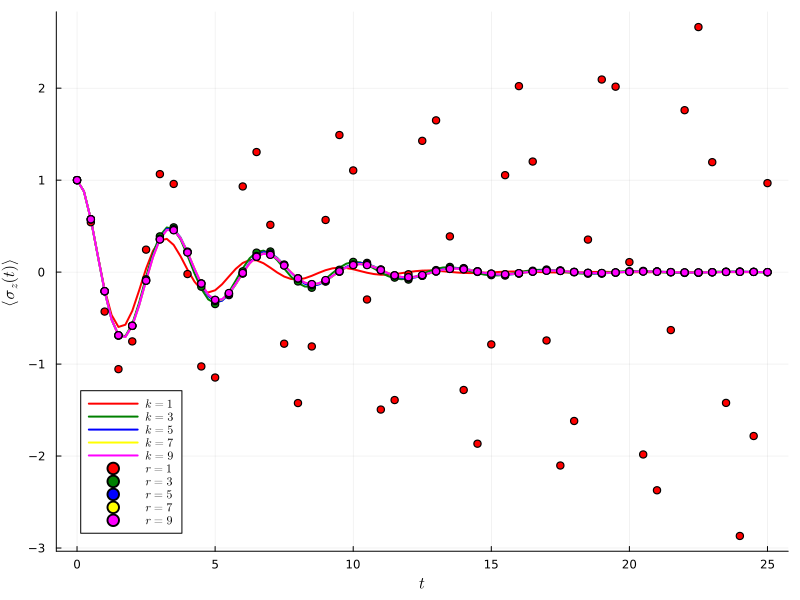

In [51]:
plot(time, sigma_z, lw = 2, label=permutedims([L"k = %$k" for k in kmax]), size=(800, 600), seriescolor=colors)
time_short = time[1:2:end]
sigma_z_short = [s[1:2:end] for s in sigma_z_TTM]
scatter!(time_short, sigma_z_short, ms=4, label=permutedims([L"r = %$r" for r in rmax]), size=(800, 600), seriescolor=colors)
xlabel!(L"t")
ylabel!(L"\langle\sigma_z(t)\rangle")

# Slower, Strongly-coupled Bath

In [29]:
sd = spectral_density.OhmicSpectralDensity(1.2, 2.5, 1.0)

EtaCoefficients.spectral_density.OhmicSpectralDensity(1.2, 2.5, 1.0)

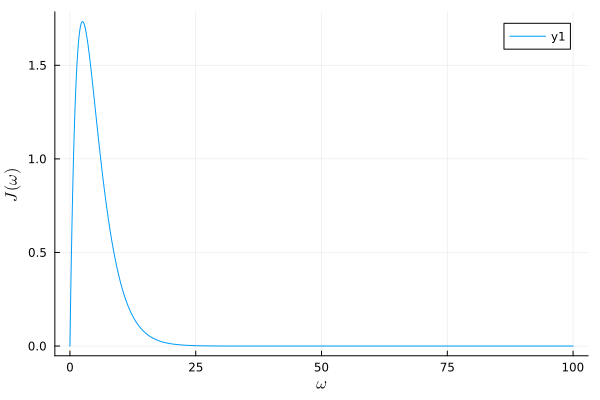

In [30]:
ω = 0:0.1:100
plot(ω, sd.(ω))
xlabel!(L"\omega")
ylabel!(L"J(\omega)")

In [31]:
dt = 0.125
ntimes = 200
time = 0:dt:dt*ntimes
β = 0.2

0.2

In [44]:
sigma_z = []
colors = ["red" "green" "blue" "yellow" "magenta"]
kmax = 1:2:9
for k in kmax
    @time ρs = QuAPI.propagate(; Hamiltonian=H, spect_dens=sd, β, ρ0, dt, ntimes, kmax=k)
    push!(sigma_z, real(ρs[1,1,:] - ρs[2,2,:]))
end
sigma_z_TTM = []
rmax = 1:2:9
for r in rmax
    @time ρs = TTM.propagate(; Hamiltonian=H, spect_dens=sd, β, ρ0, dt, ntimes, rmax=r, build_propagator=QuAPI.build_propagator)
    push!(sigma_z_TTM, real(ρs[1,1,:] - ρs[2,2,:]))
end

  0.022785 seconds (924.99 k allocations: 34.444 MiB)


  0.043259 seconds (1.29 M allocations: 88.528 MiB)


  0.254332 seconds (7.09 M allocations: 674.929 MiB, 17.75% gc time)


  4.120582 seconds (98.96 M allocations: 9.150 GiB, 22.38% gc time)


136.836031 seconds (1.55 G allocations: 142.712 GiB, 39.40% gc time)
  0.027661 seconds (902.83 k allocations: 32.943 MiB)


  0.173211 seconds (909.04 k allocations: 52.749 MiB, 75.08% gc time)
  0.057542 seconds (946.43 k allocations: 75.737 MiB)


  0.097817 seconds (1.48 M allocations: 149.602 MiB)


  0.955280 seconds (10.01 M allocations: 1.010 GiB, 35.95% gc time)


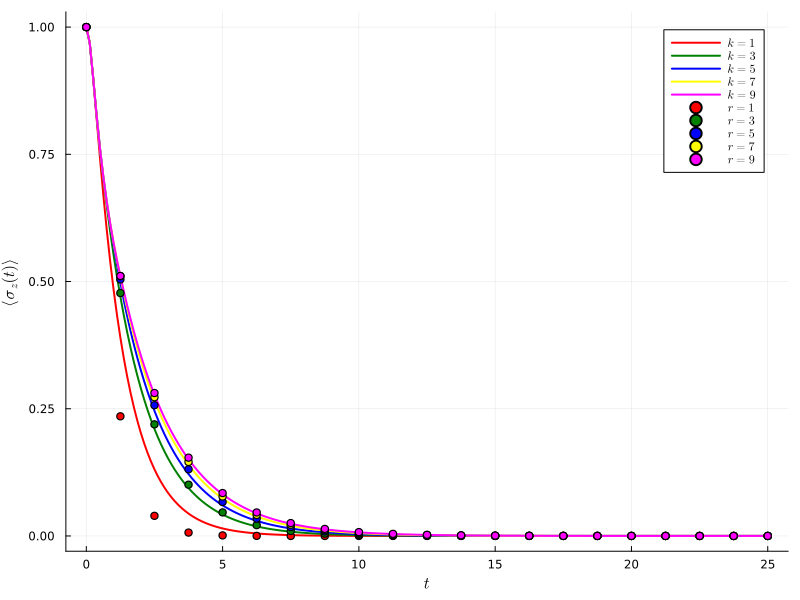

In [43]:
plot(time, sigma_z, lw = 2, label=permutedims([L"k = %$k" for k in kmax]), size=(800, 600), seriescolor=colors)
time_short = time[1:10:end]
sigma_z_short = [s[1:10:end] for s in sigma_z_TTM]
scatter!(time_short, sigma_z_short, ms=4, label=permutedims([L"r = %$r" for r in rmax]), size=(800, 600), seriescolor=colors)
xlabel!(L"t")
ylabel!(L"\langle\sigma_z(t)\rangle")